# Bike Sharing Rebalancing Problem

The following implementation is derivated from the following paper: https://www.sciencedirect.com/science/article/abs/pii/S0305048313001187


## Introduction

Il Bike sharing sta riscutendo un notevole successo per via dei suoi numerosi vantaggi che vanno dalla riduzione del traffico ad una maggiore sostenibilità. Con il crescente interesse verso l'adozione di questo modello sono aumentate anche le ricerche per ottimizzare il sistema e ridurre i suoi costi.

In generale in un sistema di bike sharing le stazioni sono composte da differenti slot, ognuno dei quali può ospitare una singola bicicletta. Nei sistemi moderni le stazioni sono connesse ad internet in maniera che il sistema possa essere monitorato e le informazioni raccolte possano essere usate per migliorare il sistema.

Tra i costi giornalieri del sistema che includono manutenzione, assicurazione, elettricità il costo che il paper va ad analizzare è il <b>costo di redistribuzione</b>.

Infatti a fine giornata infatti ci possono essere stazioni completamente vuote o stazioni piene quello che si fa solitamente è nella notte redistribuire le bici nelle varie stazioni.
Il riposizionamento è fatto in base alle <b>capacità</b> dei <b>veicoli</b> presenti in un deposito centrale che prende le biciclette da stazioni dove il livello di <b>occupazione</b> è troppo alto e le rialloca nelle stazioni dove il livello è troppo basso. Solitamente una quantità di biciclette è tenuto nel deposito consetendo una più flessibile riallocazione. Il problema è noto in letteratura come Bike sharing Rebalacing Problem (BRP).
Nel paper sono proposte 4 <b>Mixed Integer Linear Programming(MILP)</b> formulation. Questa tesina tratta la formulazione F4.

Il problema è una versione più specifica del problema del commesso viaggiatore, le variabili del problema sono:

| Variable Name  | Description |
| ------------- | ------------- |
| <i>V</i>   | Set of vertices |
| <i>A</i>   | Set of arcs  |
| <i>n</i>   | Number of stations |
| <i>m</i>   |  Number of vehicles  |
| <i>Q</i>   | Vehicle capacity |
| <i>q<sub>i</sub></i>  |  Demand at vertex i  |
| <i>c<sub>ij</sub></i>  |  Cost of arc (i,j)  |

Queste variabili sono condivise fra tutte le formulazioni. 
La particolarità di questa formulazione è la presenza di <b>due depositi</b>, uno iniziale da cui il mezzo parte e uno finale in cui il mezzo deve arrivare.

Inoltre relativamente a questa formulazione abbiamo V<sub>0</sub> = V \ {0, n+1} ovvero una variabile che considera tutte le stazioni tranne i due depositi. <br/>
Quello che si vuole ottenere è minimizzare la funzione obiettivo espressa come: 

min $\sum_{\substack{i \in V}}$$\sum_{\substack{j \in V}}$ c<sub>ij</sub> x<sub>ij</sub>

Nella funzione obiettivo x<sub>ij</sub> rappresenta lo specifico arco utilizzato mentre c<sub>ij</sub> rappresenta una funzione costo che nel problema è espressa come la distanza euclidea tra i due nodi i e j (stazioni).

I vincoli per la specifica trattazione sono: 

$\sum_{\substack{i \in V}}$ x<sub>i,j</sub> = 1, j $\in$ V<sub>0</sub> (17) <br/>
$\sum_{\substack{i \in V}}$ x<sub>j,i</sub> = 1, j $\in$ V<sub>0</sub> (18)
<br/>
$\sum_{\substack{j \in V}}$ x<sub>0,j</sub> $\leq$ m, j $\in$ V<sub>0</sub> (19)
<br/>
$\sum_{\substack{j \in V_0}}$ x<sub>0,j</sub> = $\sum_{\substack{j \in V_0}}$ x<sub>j,n+1</sub> (20)
<br/>
$\sum_{\substack{i \in S}}$$\sum_{\substack{j \in S}}$ x<sub>i,j</sub> $\leq$ $\mid$S$\mid$ - 1, S $\subseteq V_0, S \neq \emptyset$ (21)
<br/>
$f_{ij} + g_{ij} = Qx_{ij} (i,j) \in A$ (22)
<br/>
$\sum_{\substack{i \in V}} (f_{ij} - g_{ij}) - \sum_{\substack{i \in V}} (f_{ij} - g_{ji}) = 2q_j, j \in V_0$ (23)
<br/>
$\sum_{\substack{j \in V_0}} f_{0,j} \geq max[0, -Q_{tot}]$ (24)
<br/>
$\sum_{\substack{j \in V_0}} f_{j,n+1} \geq max{Q, Q_{tot}}$ (25)
<br/>
$\sum_{\substack{j \in V_0}} g_{j0} \leq min [mQ, mQ + Q_{tot}]$ (26)
<br/>
$max[0, q_i, -q_j]x_{ij} \leq f_{ij} \leq min[Q, Q + q_i, Q -q_j]x_{ij}, (i,j) \in  A $ (27)
<br/>
$ (Q - min[Q, Q + q_i, Q - q_i]) x_{ij} \leq g_{ji} \leq ( Q - max[0, q_i, -q_j]) x_{ij}, (i,j) \in A $ (28)
<br/>
$ x{ij} \in [0,1], i,j \in V$

I <b>vincoli (17)-(20) e (29)</b> sono equivalenti ai vincoli discussi nella trattazione F1 con la differenza che sono stati adattati al nuovo set di vertici e archi. <br/>
Il <b>vincolo (22)</b> afferma che se un veicolo viaggia lungo un arco (i,j) allora la somma del suo carico e del suo spazio residuo in quel arco è uguale alla capacità del veicolo. <br/>
Il <b>vincolo (23)</b> impone che la differenza tra i carichi e le capacità residue che entrano ed escono in un vertice è doppia rispetto alla domanda di quel vertice. <br/>
Il <b>vincolo (24)</b> impone che il carico totale uscendo dal deposito iniziale deve essere in ogni caso non negativo e inoltre nel caso $Q_{tot}$ prenda un valore negativo questo non debba essere più piccolo del suo valore. (?)
<br/>
Similmente il <b>vincolo (25)</b> impone che il carico totale entrante nel deposito finale sia in ogni caso non negativo e non più bassso della somma di tutte le domande nel caso in cui sia positivo.
<br/>
Il <b>vincolo (26)</b> impone che lo spazio libero nei veicoli che lasciano il deposito deve essere minore del minor valore tra la capacità totale degli m veicoli e la capacità totale più Q_{tot}
<br/>
Il <b>vincolo (27)</b> e <b>(28)</b> forzano il lower and upper bound delle variabili continue.

Il progetto è diviso in due parti principali:
<br/>
-Nella <b>prima parte</b> si inizializzano le variabili e si imposta il modello. <br/>
-Nella <b>seconda parte</b> si valutano i risultati ottenuti e si confrontano con le altre formulazioni.

## Parte 1 

In [112]:
#Importing cplex API
import sys
import docplex.cp

#Importing numpy and random generator
import numpy as np
rand = np.random

#Importing pyplot
import matplotlib.pyplot as plt

#Importing docplex model
from docplex.mp.model import Model
import itertools

In [113]:
#Initial values
n = 6                                      # amount of stations (Reggio-Emilia)
m = 2                                            # amount of vehicles
Q = 10                                           # vehicles capacity
end = n + 1
Vo = [i for i in range(1, n+1)] # stations without starting and ending deposit   
V = [0] + Vo + [end] 
#A = [(i, j) for i in V for j in V]           # edges A_tilde
A_tilde = [(i, j) for i in V for j in V]  
q = {i: rand.randint(-Q, Q) for i in V}           # demand along edges
#q[0] = 0
q[n+1] = 0
Qtot = sum(q.values()) - q[0] - q[n+1]
A_tilde

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7)]

In [114]:
# Generating random coordinates and computing the distances using euclidian distance
coord = rand.rand(len(V), 2) * 500
c = {(i, j): 
        float('Inf') if i == n+1 else np.hypot(coord[i][0]-coord[j][0], coord[i][1]-coord[j][1]) 
             for i, j in A_tilde}       
for i in c.keys():
    if i[0] == 0 and i[1] == n+1:
        c[i] = 0.0
    elif i[1] == n+1:
        c[i] = c[i[0], 0]
for i in c.keys():
    if i[1] == 0:
        c[i] = float('inf')
c

{(0, 0): inf,
 (0, 1): 66.54888367341735,
 (0, 2): 142.8265625033235,
 (0, 3): 130.53531000559383,
 (0, 4): 344.8824552689521,
 (0, 5): 312.52257825578755,
 (0, 6): 344.7662804020492,
 (0, 7): 0.0,
 (1, 0): inf,
 (1, 1): 0.0,
 (1, 2): 200.2781378050387,
 (1, 3): 96.28793685810975,
 (1, 4): 298.7183073993836,
 (1, 5): 352.6910688123762,
 (1, 6): 296.6454177136446,
 (1, 7): 66.54888367341735,
 (2, 0): inf,
 (2, 1): 200.2781378050387,
 (2, 2): 0.0,
 (2, 3): 206.6207052714003,
 (2, 4): 398.85700303217715,
 (2, 5): 186.50560067779384,
 (2, 6): 403.40091577305986,
 (2, 7): 142.8265625033235,
 (3, 0): inf,
 (3, 1): 96.28793685810975,
 (3, 2): 206.6207052714003,
 (3, 3): 0.0,
 (3, 4): 214.7300690264646,
 (3, 5): 310.4016248535524,
 (3, 6): 215.26264891592768,
 (3, 7): 130.53531000559383,
 (4, 0): inf,
 (4, 1): 298.7183073993836,
 (4, 2): 398.85700303217715,
 (4, 3): 214.7300690264646,
 (4, 4): 0.0,
 (4, 5): 425.29499873682084,
 (4, 6): 13.394399331381662,
 (4, 7): 344.8824552689521,
 (5, 0): i

(47.726158855307915, 511.4385262980695, 54.71342550029498, 500.29180360923164)

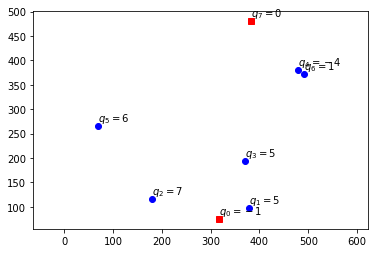

In [115]:
for point in coord[1:]:   
    plt.scatter(point[0], point[1], c='b')

for i in V:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (coord[i][0], coord[i][1]+10))

plt.plot(coord[0][0], coord[0][1], c='r', marker='s') #marker=(5, 1)
plt.plot(coord[end][0], coord[end][1], c='r', marker='s') 
plt.axis('equal')

In [116]:
# Model
f4 = Model('Formulation-F4')

# Decision variables
x = f4.binary_var_dict(A_tilde, name='x')
f = f4.continuous_var_dict(A_tilde, name='f')
g = f4.continuous_var_dict(A_tilde, name='g')

In [117]:
#Function to minimize
f4.minimize(f4.sum(c[i, j]*x[i, j] for i in V for j in V))

#Constraints
f4.add_constraints(f4.sum(x[i, j] for i in V) == 1 for j in Vo) #17
f4.add_constraints(f4.sum(x[j, i] for i in V) == 1 for j in Vo) #18
f4.add_constraint(f4.sum(x[0, j] for j in V) <= m ) #19
f4.add_constraint(f4.sum(x[0, j] for j in Vo) == f4.sum(x[i, n-1] for i in Vo)) #20

for i in range(1, len(Vo) + 1):
    for S in itertools.permutations(Vo, i):
        f4.add_constraint(f4.sum(x[i, j] for j in S for i in S) <= len(S)-1) # 21
        
f4.add_constraints((f[i,j] + g[j,i]) == Q * x[i,j] for i in V for j in V)       #22
f4.add_constraints((f4.sum((f[j, i] - g[i,j]) for i in V) - f4.sum((f[i, j] - g[j,i]) for i in V)) == 2*q[j] for j in Vo) #23
f4.add_constraint(f4.sum(f[0,j] for j in Vo) >= f4.max(0, -Qtot)) #24
f4.add_constraint(f4.sum(f[j,end] for j in Vo) >= f4.max(0, Qtot)) #25
f4.add_constraint((f4.sum(g[j,0] for j in Vo) <= min(m*Q, m*Q + Qtot)))                   #26

f4.add_constraints((max(0,q[i],-q[j]) * x[i,j]) <= f[i,j] for i in V for j in V)                   #27_1
f4.add_constraints(f[i,j] <= (min(Q,Q + q[i],Q -q[j]) * x[i,j])  for i in V for j in V)                   #27_2

f4.add_constraints(((Q - min(Q, Q + q[i], Q - q[j])) * x[i,j]) <= g[j,i] for i in V for j in V)                 #28_1
f4.add_constraints((g[j,i] <= (Q - max(0, q[i], -q[j])) * x[i,j]) for i in V for j in V)                   #28_2


solutionF4 = f4.solve(log_output=True)
f4.solve(log_output=True)


Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 4 times.
MIP Presolve eliminated 2141 rows and 59 columns.
MIP Presolve modified 141 coefficients.
Aggregator did 53 substitutions.
Reduced MIP has 107 rows, 80 columns, and 435 nonzeros.
Reduced MIP has 31 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (11.28 ticks)
Found incumbent of value 6.0000000e+20 after 0.03 sec. (12.01 ticks)
Probing time = 0.00 sec. (0.13 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 107 rows, 80 columns, and 435 nonzeros.
Reduced MIP has 31 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.12 ticks)
Clique table members: 38.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Ro

docplex.mp.solution.SolveSolution(obj=1e+20,values={x_0_2:1,x_1_3:1,x_2_..

In [118]:
print(solutionF4)


solution for: Formulation-F4
objective: 1e+20
x_0_2=1
x_1_3=1
x_2_4=1
x_3_7=1
x_4_5=1
x_5_6=1
x_6_7=1
x_7_1=1
f_1_3=5.000
f_2_4=7.000
f_3_7=10.000
f_4_5=3.000
f_5_6=9.000
f_6_7=10.000
g_1_7=10.000
g_2_0=10.000
g_3_1=5.000
g_4_2=3.000
g_5_4=7.000
g_6_5=1.000



In [119]:
print(solutionF4.solve_details)


status  = integer optimal solution
time    = 0.094 s.
problem = MILP
gap     = 0%



[(0, 2), (1, 3), (2, 4), (3, 7), (4, 5), (5, 6), (6, 7), (7, 1)]

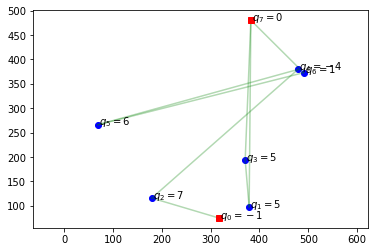

In [120]:
active_arcs = [a for a in A_tilde if x[a].solution_value > 0.9]

for point in coord[1:]:   
    plt.scatter(point[0], point[1], c='b')
    
for i in V:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (coord[i][0]+2, coord[i][1]))
    
for i, j in active_arcs:
    plt.plot([coord[i][0], coord[j][0]], [coord[i][1], coord[j][1]], c='g', alpha=0.3)
    
plt.plot(coord[0][0], coord[0][1], c='r', marker='s') # Starting depot
plt.plot(coord[n+1][0], coord[n+1][1], c='r', marker='s') # Ending depot
plt.axis('equal')

active_arcs